# Importing data

importing all data and combining them into one

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)     
pd.set_option('display.width', 1000)  


In [54]:
sheets =  pd.ExcelFile('Competition Analysis report 11-08-2025 (1).xlsx')
dfs = []
for sheet in sheets.sheet_names:
   
    df = pd.read_excel('Competition Analysis report 11-08-2025 (1).xlsx', sheet_name=sheet)
    df["Platform"] = sheet   
    dfs.append(df)

master_df = pd.concat(dfs, ignore_index=True)

master_df

,Platform,Location,Product category,Product Name,Brand,Weight(g),MRP,Promo,Selling Price,Price Per Gm,Price per 100g,Weight(g).1,MRP.1,Promo.1,Selling Price.1,Sattviko Price per gm,Sattviko Price per 100gm,Difference (per gm),Difference (per 100 gm),Remarks
0,Zepto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Zepto,Delhi,Raw makhana,Farmley Prasadam Makhana,Farmley,100.0,299.0,0.32,199.00,1.990000,199.000000,200.0,330.0,0.00,330.0,1.650,165.0,0.340000,34.000000,NaN
2,Zepto,NaN,NaN,Mom Premium Raw Makhana,Mom,100.0,230.0,0.22,179.00,1.790000,179.000000,200.0,330.0,0.00,330.0,1.650,165.0,0.140000,14.000000,NaN
3,Zepto,NaN,NaN,Mr. Makhana Veda Premium Raw Makhana,Mr Makhana,200.0,595.0,0.12,521.00,2.605000,260.500000,200.0,330.0,0.00,330.0,1.650,165.0,0.955000,95.500000,NaN
4,Zepto,NaN,NaN,TMI Colman Prasad Makhana,TMI Colman,200.0,499.0,0.30,349.00,1.745000,174.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Zepto,NaN,Flavoured makhana,Mom Roasted Makhana Peri Peri,Mom,104.0,280.0,0.11,248.00,2.384615,238.461538,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
6,Zepto,NaN,NaN,Lets Try Peri Peri Roasted Makhana,Let's Try,60.0,160.0,0.20,128.00,2.133333,213.333333,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
7,Zepto,NaN,NaN,Mr Makhana Peri Peri,Mr Makhana,55.0,150.0,0.02,146.00,2.654545,265.454545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Zepto,NaN,NaN,Farmley Peri Peri Makhana,Farmley,231.0,717.0,0.27,522.00,2.259740,225.974026,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
9,Zepto,NaN,NaN,MTR Masala Upma Mix,MTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,NaN


In [55]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Platform                  232 non-null    object 
 1   Location                  25 non-null     object 
 2   Product category          64 non-null     object 
 3   Product Name              218 non-null    object 
 4   Brand                     186 non-null    object 
 5   Weight(g)                 160 non-null    float64
 6   MRP                       160 non-null    float64
 7   Promo                     160 non-null    float64
 8   Selling Price             160 non-null    float64
 9   Price Per Gm              159 non-null    float64
 10  Price per 100g            159 non-null    float64
 11  Weight(g).1               50 non-null     float64
 12  MRP.1                     50 non-null     float64
 13  Promo.1                   50 non-null     float64
 14  Selling Pr

# Exporting to SQL

In [56]:
import sqlalchemy

engine = sqlalchemy.create_engine("mssql+pyodbc://@DESKTOP-3I9MJV7\SQLEXPRESS/delivery_apps?driver=ODBC+Driver+17+for+SQL+Server&Trusted_Connection=yes")
master_df.to_sql("food_Data", con=engine, if_exists="replace", index=False)
print("completed")

completed


# Importing cleaned data from SQL

In [8]:
import sqlalchemy
engine = sqlalchemy.create_engine("mssql+pyodbc://@DESKTOP-3I9MJV7\SQLEXPRESS/delivery_apps?driver=ODBC+Driver+17+for+SQL+Server&Trusted_Connection=yes")
data=pd.read_sql_table('cleaned_food_data',engine)
data

,Platform,product_name,Brand,Weight(g),MRP,Selling_price,Price_per_100g,discount%,sattviko_price_per_100gm
0,BigBasket,farmley peri peri makhana,farmley,16.0,50.0,49.00,306.25,2.00,225.00
1,Blinkit,farmley peri peri makhana,farmley,55.0,159.0,140.00,254.55,11.95,180.00
2,Swiggy,farmley peri peri makhana,farmley,77.0,239.0,176.00,228.57,26.36,0.00
3,Swiggy,farmley peri peri makhana,farmley,16.0,50.0,45.00,281.25,10.00,0.00
4,Zepto,farmley peri peri makhana,farmley,231.0,717.0,522.00,225.97,27.20,0.00
5,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,547.85,273.93,7.92,0.00
6,BigBasket,farmley prasadam makhana,farmley,100.0,299.0,230.00,230.00,23.08,0.00
7,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,475.85,237.93,20.03,0.00
8,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,457.85,228.93,23.05,0.00
9,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,457.85,228.93,23.05,0.00


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Platform                  174 non-null    object 
 1   product_name              174 non-null    object 
 2   Brand                     174 non-null    object 
 3   Weight(g)                 174 non-null    float64
 4   MRP                       174 non-null    float64
 5   Selling_price             174 non-null    float64
 6   Price_per_100g            174 non-null    float64
 7   discount%                 174 non-null    float64
 8   sattviko_price_per_100gm  174 non-null    float64
dtypes: float64(6), object(3)
memory usage: 12.4+ KB


# EDA and KPI calculation

## 1. Discount & MRP Proposal

In [9]:
# calculating net revenue of platform (ie platform keep 45% form its selling price)
data['revenue']=data['Selling_price']*(1-0.45)
data

,Platform,product_name,Brand,Weight(g),MRP,Selling_price,Price_per_100g,discount%,sattviko_price_per_100gm,revenue
0,BigBasket,farmley peri peri makhana,farmley,16.0,50.0,49.00,306.25,2.00,225.00,26.9500
1,Blinkit,farmley peri peri makhana,farmley,55.0,159.0,140.00,254.55,11.95,180.00,77.0000
2,Swiggy,farmley peri peri makhana,farmley,77.0,239.0,176.00,228.57,26.36,0.00,96.8000
3,Swiggy,farmley peri peri makhana,farmley,16.0,50.0,45.00,281.25,10.00,0.00,24.7500
4,Zepto,farmley peri peri makhana,farmley,231.0,717.0,522.00,225.97,27.20,0.00,287.1000
5,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,547.85,273.93,7.92,0.00,301.3175
6,BigBasket,farmley prasadam makhana,farmley,100.0,299.0,230.00,230.00,23.08,0.00,126.5000
7,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,475.85,237.93,20.03,0.00,261.7175
8,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,457.85,228.93,23.05,0.00,251.8175
9,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,457.85,228.93,23.05,0.00,251.8175


In [30]:
#calculating new discounts on few foods based on diffrent festivals
# lets say if price per 100g>  avg price of foodtype we increase discount(lets say upto 25%) (ie higher discounts on fast-moving SKUs)

data['avg_price_of_foodtype']=data.groupby('product_name')['Price_per_100g'].transform('mean')
data['avg_price_of_foodtype']=round(data['avg_price_of_foodtype'],2)

def new_discount(row):
    if row['Price_per_100g']>row['avg_price_of_foodtype']:
        new_discount=row['discount%']+25
    else:
        new_discount=row['discount%']+7

    return new_discount
    
data['new_discount%']=data.apply(new_discount,axis=1)
data

,Platform,product_name,Brand,Weight(g),MRP,Selling_price,Price_per_100g,discount%,sattviko_price_per_100gm,revenue,avg_price_of_foodtype,new_discount%,new_selling_price,new_MRP,new_revenue
0,BigBasket,farmley peri peri makhana,farmley,16.0,50.0,49.00,306.25,2.00,225.00,26.9500,267.00,27.00,41.65,42.50,22.91
1,Blinkit,farmley peri peri makhana,farmley,55.0,159.0,140.00,254.55,11.95,180.00,77.0000,267.00,18.95,130.20,147.87,71.61
2,Swiggy,farmley peri peri makhana,farmley,77.0,239.0,176.00,228.57,26.36,0.00,96.8000,228.57,33.36,163.68,222.27,90.02
3,Swiggy,farmley peri peri makhana,farmley,16.0,50.0,45.00,281.25,10.00,0.00,24.7500,267.00,35.00,38.25,42.50,21.04
4,Zepto,farmley peri peri makhana,farmley,231.0,717.0,522.00,225.97,27.20,0.00,287.1000,267.00,34.20,485.46,666.81,267.00
5,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,547.85,273.93,7.92,0.00,301.3175,218.49,32.92,465.67,505.75,256.12
6,BigBasket,farmley prasadam makhana,farmley,100.0,299.0,230.00,230.00,23.08,0.00,126.5000,218.49,48.08,195.50,254.15,107.52
7,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,475.85,237.93,20.03,0.00,261.7175,218.49,45.03,404.47,505.75,222.46
8,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,457.85,228.93,23.05,0.00,251.8175,217.79,48.05,389.17,505.75,214.04
9,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,457.85,228.93,23.05,0.00,251.8175,217.79,48.05,389.17,505.75,214.04


In [31]:
#new selling price
new_selling_price_dis=data['Selling_price']*((data['new_discount%']-data['discount%'])/100)
data['new_selling_price']=round((data['Selling_price']-new_selling_price_dis),2)
data

,Platform,product_name,Brand,Weight(g),MRP,Selling_price,Price_per_100g,discount%,sattviko_price_per_100gm,revenue,avg_price_of_foodtype,new_discount%,new_selling_price,new_MRP,new_revenue
0,BigBasket,farmley peri peri makhana,farmley,16.0,50.0,49.00,306.25,2.00,225.00,26.9500,267.00,27.00,36.75,42.50,22.91
1,Blinkit,farmley peri peri makhana,farmley,55.0,159.0,140.00,254.55,11.95,180.00,77.0000,267.00,18.95,130.20,147.87,71.61
2,Swiggy,farmley peri peri makhana,farmley,77.0,239.0,176.00,228.57,26.36,0.00,96.8000,228.57,33.36,163.68,222.27,90.02
3,Swiggy,farmley peri peri makhana,farmley,16.0,50.0,45.00,281.25,10.00,0.00,24.7500,267.00,35.00,33.75,42.50,21.04
4,Zepto,farmley peri peri makhana,farmley,231.0,717.0,522.00,225.97,27.20,0.00,287.1000,267.00,34.20,485.46,666.81,267.00
5,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,547.85,273.93,7.92,0.00,301.3175,218.49,32.92,410.89,505.75,256.12
6,BigBasket,farmley prasadam makhana,farmley,100.0,299.0,230.00,230.00,23.08,0.00,126.5000,218.49,48.08,172.50,254.15,107.52
7,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,475.85,237.93,20.03,0.00,261.7175,218.49,45.03,356.89,505.75,222.46
8,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,457.85,228.93,23.05,0.00,251.8175,217.79,48.05,343.39,505.75,214.04
9,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,457.85,228.93,23.05,0.00,251.8175,217.79,48.05,343.39,505.75,214.04


In [32]:
#new mrp
new_mrp_dis=data['MRP']*((data['new_discount%']-data['discount%'])/100)
data['new_MRP']=round((data['MRP']-new_mrp_dis),2)
data

,Platform,product_name,Brand,Weight(g),MRP,Selling_price,Price_per_100g,discount%,sattviko_price_per_100gm,revenue,avg_price_of_foodtype,new_discount%,new_selling_price,new_MRP,new_revenue
0,BigBasket,farmley peri peri makhana,farmley,16.0,50.0,49.00,306.25,2.00,225.00,26.9500,267.00,27.00,36.75,37.50,22.91
1,Blinkit,farmley peri peri makhana,farmley,55.0,159.0,140.00,254.55,11.95,180.00,77.0000,267.00,18.95,130.20,147.87,71.61
2,Swiggy,farmley peri peri makhana,farmley,77.0,239.0,176.00,228.57,26.36,0.00,96.8000,228.57,33.36,163.68,222.27,90.02
3,Swiggy,farmley peri peri makhana,farmley,16.0,50.0,45.00,281.25,10.00,0.00,24.7500,267.00,35.00,33.75,37.50,21.04
4,Zepto,farmley peri peri makhana,farmley,231.0,717.0,522.00,225.97,27.20,0.00,287.1000,267.00,34.20,485.46,666.81,267.00
5,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,547.85,273.93,7.92,0.00,301.3175,218.49,32.92,410.89,446.25,256.12
6,BigBasket,farmley prasadam makhana,farmley,100.0,299.0,230.00,230.00,23.08,0.00,126.5000,218.49,48.08,172.50,224.25,107.52
7,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,475.85,237.93,20.03,0.00,261.7175,218.49,45.03,356.89,446.25,222.46
8,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,457.85,228.93,23.05,0.00,251.8175,217.79,48.05,343.39,446.25,214.04
9,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,457.85,228.93,23.05,0.00,251.8175,217.79,48.05,343.39,446.25,214.04


In [33]:
# new revenue for platforms
data['new_revenue']=round(data['new_selling_price']*(1-0.45),2)
data

,Platform,product_name,Brand,Weight(g),MRP,Selling_price,Price_per_100g,discount%,sattviko_price_per_100gm,revenue,avg_price_of_foodtype,new_discount%,new_selling_price,new_MRP,new_revenue
0,BigBasket,farmley peri peri makhana,farmley,16.0,50.0,49.00,306.25,2.00,225.00,26.9500,267.00,27.00,36.75,37.50,20.21
1,Blinkit,farmley peri peri makhana,farmley,55.0,159.0,140.00,254.55,11.95,180.00,77.0000,267.00,18.95,130.20,147.87,71.61
2,Swiggy,farmley peri peri makhana,farmley,77.0,239.0,176.00,228.57,26.36,0.00,96.8000,228.57,33.36,163.68,222.27,90.02
3,Swiggy,farmley peri peri makhana,farmley,16.0,50.0,45.00,281.25,10.00,0.00,24.7500,267.00,35.00,33.75,37.50,18.56
4,Zepto,farmley peri peri makhana,farmley,231.0,717.0,522.00,225.97,27.20,0.00,287.1000,267.00,34.20,485.46,666.81,267.00
5,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,547.85,273.93,7.92,0.00,301.3175,218.49,32.92,410.89,446.25,225.99
6,BigBasket,farmley prasadam makhana,farmley,100.0,299.0,230.00,230.00,23.08,0.00,126.5000,218.49,48.08,172.50,224.25,94.88
7,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,475.85,237.93,20.03,0.00,261.7175,218.49,45.03,356.89,446.25,196.29
8,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,457.85,228.93,23.05,0.00,251.8175,217.79,48.05,343.39,446.25,188.86
9,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,457.85,228.93,23.05,0.00,251.8175,217.79,48.05,343.39,446.25,188.86


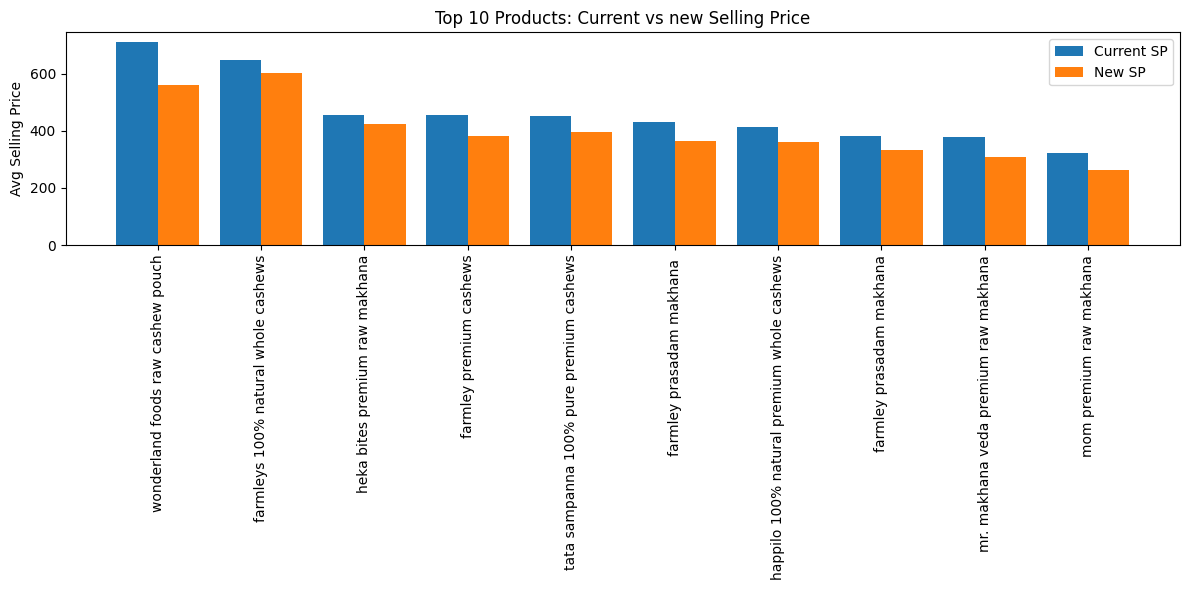

In [36]:
sell = data.groupby('product_name')["Selling_price"].mean()
new_sell = data.groupby('product_name')["new_selling_price"].mean()

top_products = sell.sort_values(ascending=False).head(10).index

sell_top = sell.loc[top_products]
new_sell_top = new_sell.loc[top_products]

plt.figure(figsize=(12,6))
x = range(len(top_products))
plt.bar([i-0.2 for i in x], sell_top, width=0.4, label="Current SP")
plt.bar([i+0.2 for i in x], new_sell_top, width=0.4, label="New SP")

plt.xticks(x, top_products, rotation=90)
plt.ylabel("Avg Selling Price")
plt.title("Top 10 Products: Current vs new Selling Price")
plt.legend()
plt.tight_layout()
plt.show()

## 2. Festival Strategy

In [50]:
# Identify which products/categories should get higher discounts during September (festival season)
# lets say prasadam Makhana, Peri Peri Makhana,peri peri roasted makhana, premium raw makhana, raw premium makhana this items have high sales in festivals

import re

items=['prasadam Makhana', 'peri peri Makhana','peri peri roasted makhana', 'premium raw makhana', 'raw premium makhana']
# Create a regex pattern from items
pattern = '|'.join([re.escape(i.lower()) for i in items])

# Vectorized check: add 25 if product_name contains any substring, else add 7
data['festiv_discount'] = data['discount%'] + data['product_name'].str.lower().str.contains(pattern).map({True: 25, False: 7})

data

,Platform,product_name,Brand,Weight(g),MRP,Selling_price,Price_per_100g,discount%,sattviko_price_per_100gm,revenue,avg_price_of_foodtype,new_discount%,new_selling_price,new_MRP,new_revenue,festiv_discount
0,BigBasket,farmley peri peri makhana,farmley,16.0,50.0,49.00,306.25,2.00,225.00,26.9500,267.00,27.00,36.75,37.50,20.21,27.00
1,Blinkit,farmley peri peri makhana,farmley,55.0,159.0,140.00,254.55,11.95,180.00,77.0000,267.00,18.95,130.20,147.87,71.61,36.95
2,Swiggy,farmley peri peri makhana,farmley,77.0,239.0,176.00,228.57,26.36,0.00,96.8000,228.57,33.36,163.68,222.27,90.02,51.36
3,Swiggy,farmley peri peri makhana,farmley,16.0,50.0,45.00,281.25,10.00,0.00,24.7500,267.00,35.00,33.75,37.50,18.56,35.00
4,Zepto,farmley peri peri makhana,farmley,231.0,717.0,522.00,225.97,27.20,0.00,287.1000,267.00,34.20,485.46,666.81,267.00,52.20
5,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,547.85,273.93,7.92,0.00,301.3175,218.49,32.92,410.89,446.25,225.99,32.92
6,BigBasket,farmley prasadam makhana,farmley,100.0,299.0,230.00,230.00,23.08,0.00,126.5000,218.49,48.08,172.50,224.25,94.88,48.08
7,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,475.85,237.93,20.03,0.00,261.7175,218.49,45.03,356.89,446.25,196.29,45.03
8,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,457.85,228.93,23.05,0.00,251.8175,217.79,48.05,343.39,446.25,188.86,48.05
9,BigBasket,farmley prasadam makhana,farmley,200.0,595.0,457.85,228.93,23.05,0.00,251.8175,217.79,48.05,343.39,446.25,188.86,48.05


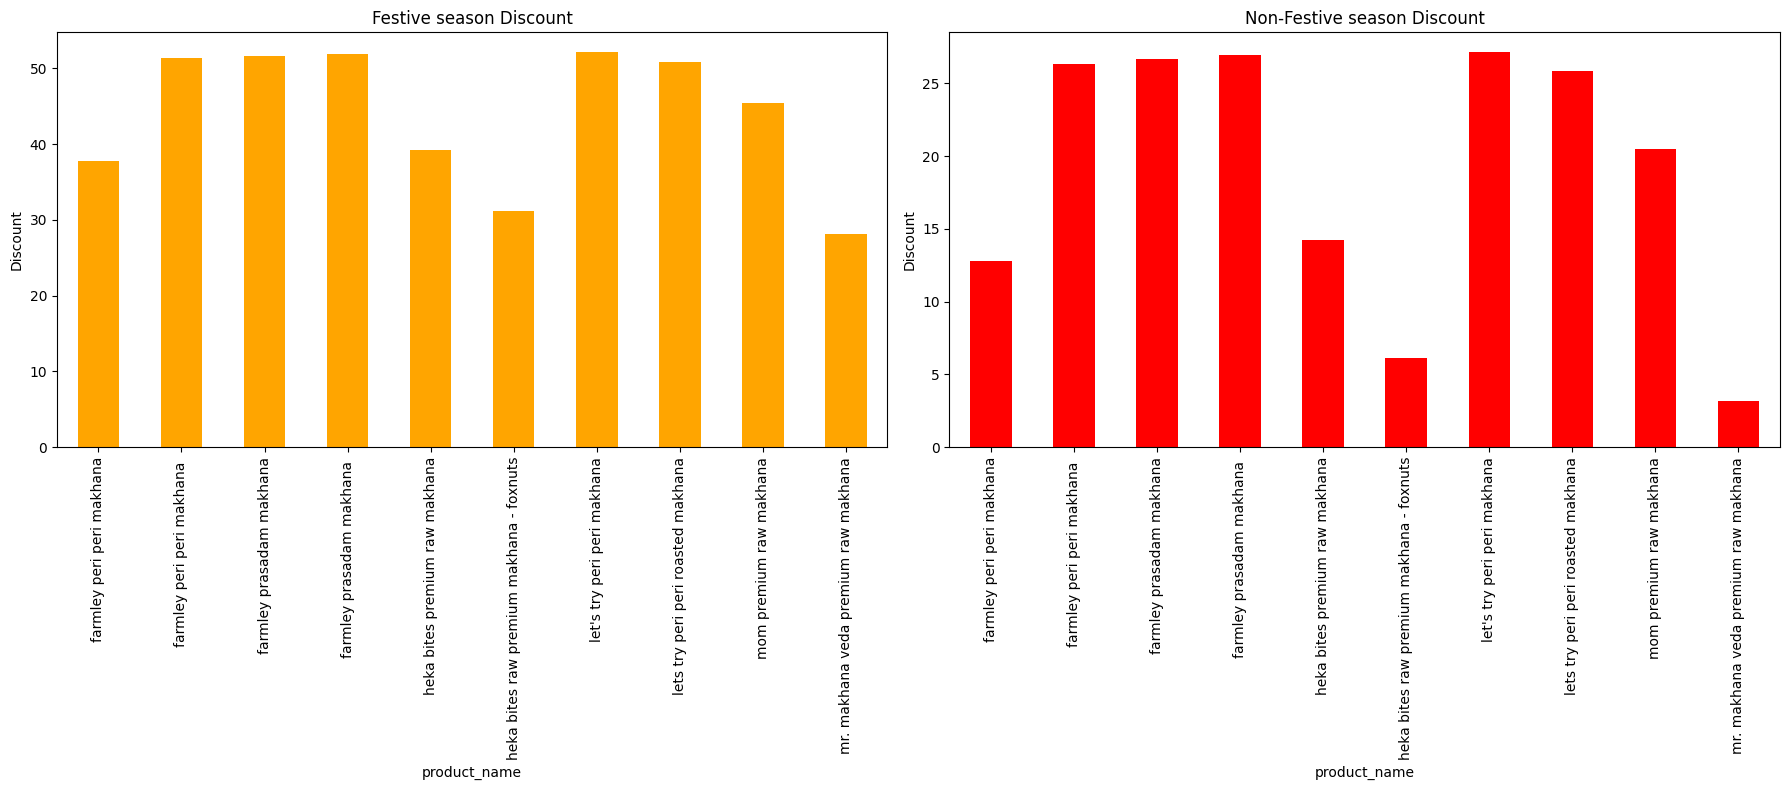

In [74]:
group = data['product_name'].str.lower().str.contains(pattern).map({True: 'Festive season', False: 'Other'})

festive = data[group == 'Festive season'].groupby('product_name')['festiv_discount'].mean()
non_festive = data[group == 'Festive season'].groupby('product_name')['discount%'].mean()

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

festive.plot(kind='bar', color='orange',ax=axs[0], title='Festive season Discount')
axs[0].set_ylabel('Discount')

non_festive.plot(kind='bar', color='red', ax=axs[1], title='Non-Festive season Discount')
axs[1].set_ylabel('Discount')

plt.tight_layout()
plt.show()

## 3. Revenue Impact Analysis

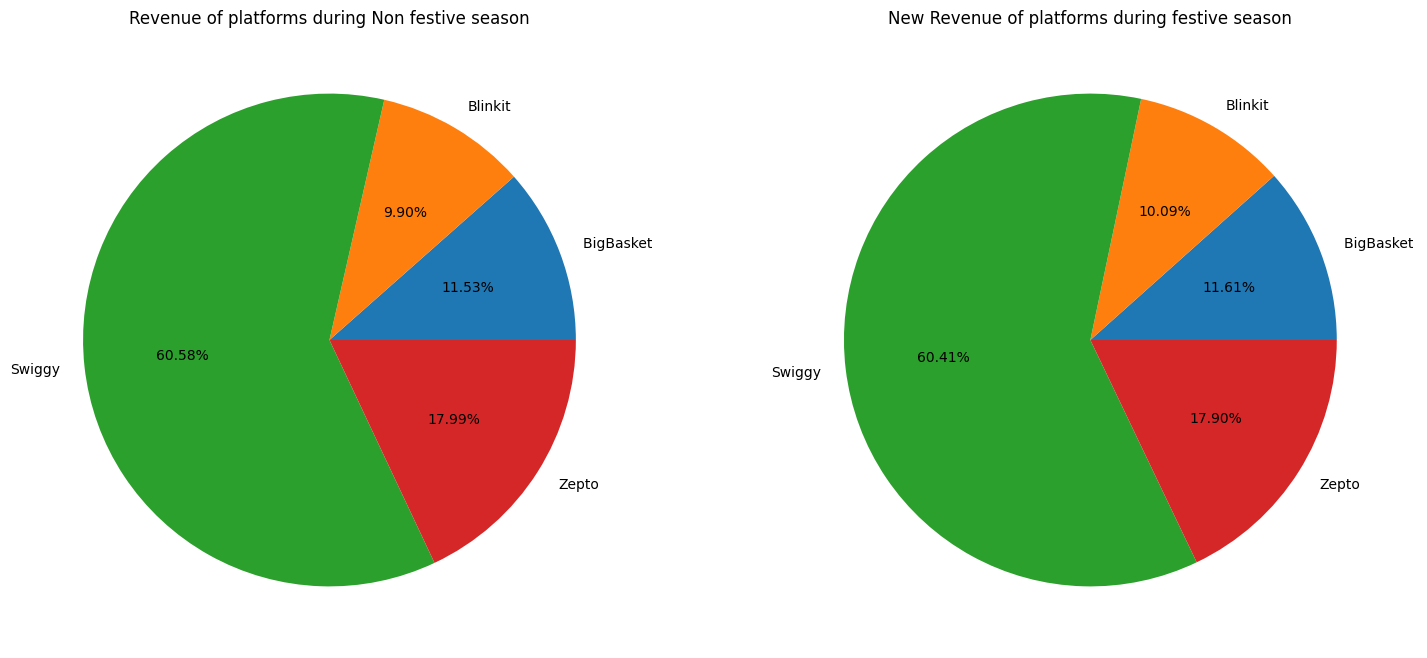

In [83]:
#Estimate net revenue per pack (after 45% margin) for each product under the new pricing.(ie new_revenue ie already estimated)
#now Compare current net revenue vs. projected net revenue for September.(ie during festive season)

cur_rev=data.groupby("Platform")['revenue'].sum()
new_rev=data.groupby("Platform")['new_revenue'].sum()
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

axs[0].pie(cur_rev,labels=cur_rev.index,autopct="%0.2f%%")
axs[0].set_title("Revenue of platforms during Non festive season")

axs[1].pie(new_rev,labels=new_rev.index,autopct="%0.2f%%")
axs[1].set_title("New Revenue of platforms during festive season")
plt.show()

           

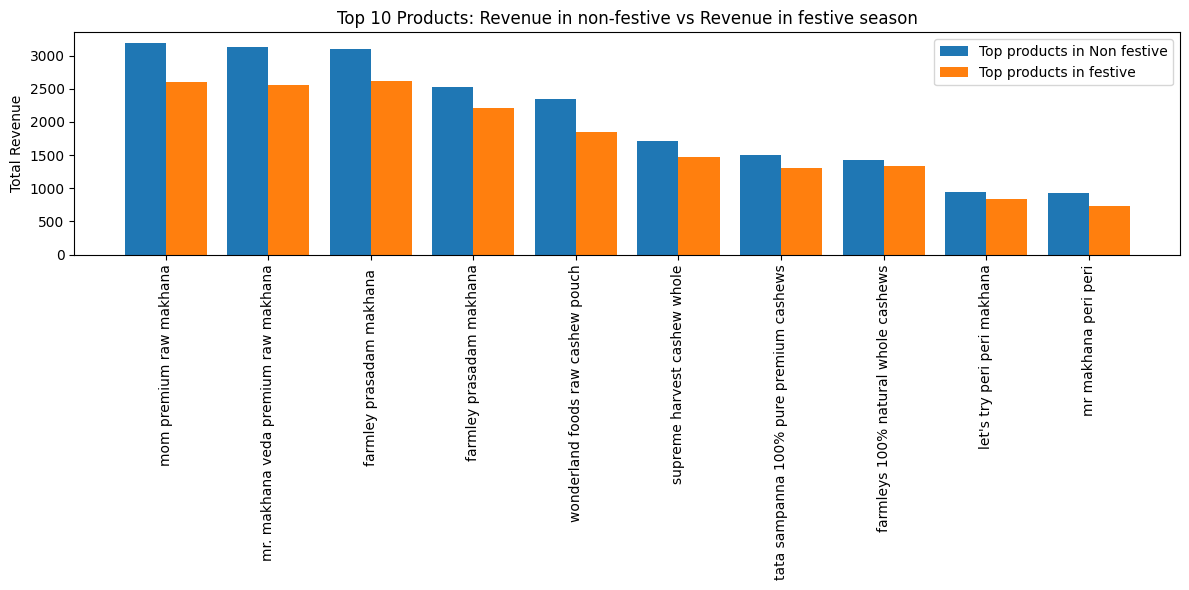

In [85]:
# Highlight which products will maximize overall revenue growth
rev = data.groupby('product_name')["revenue"].sum()
new_rev = data.groupby('product_name')["new_revenue"].sum()

top_products = rev.sort_values(ascending=False).head(10).index

rev_top = rev.loc[top_products]
new_rev_top = new_rev.loc[top_products]

plt.figure(figsize=(12,6))
x = range(len(top_products))
plt.bar([i-0.2 for i in x], rev_top, width=0.4, label="Top products in Non festive")
plt.bar([i+0.2 for i in x], new_rev_top, width=0.4, label="Top products in festive")

plt.xticks(x, top_products, rotation=90)
plt.ylabel("Total Revenue")
plt.title("Top 10 Products: Revenue in non-festive vs Revenue in festive season")
plt.legend()
plt.tight_layout()
plt.show()

## 4. Which platforms are most price-sensitive?

If a platform is price-sensitive, it means its revenue is vulnerable to price changes: a price increase leads to a significant drop in sales

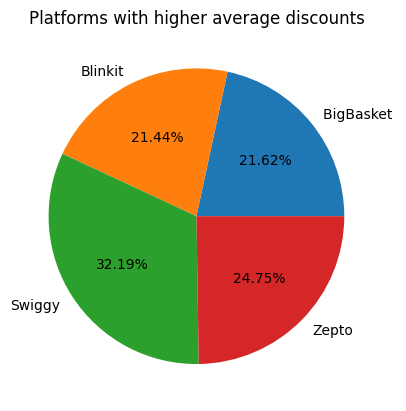

In [87]:
# Platforms with higher average discounts (checking for current discounts)

cur_dis=data.groupby("Platform")['discount%'].mean()


plt.pie(cur_dis,labels=cur_dis.index,autopct="%0.2f%%")
plt.title("Platforms with higher average discounts")

plt.show()


## 5. Where Can Sattviko Undercut Competitors?

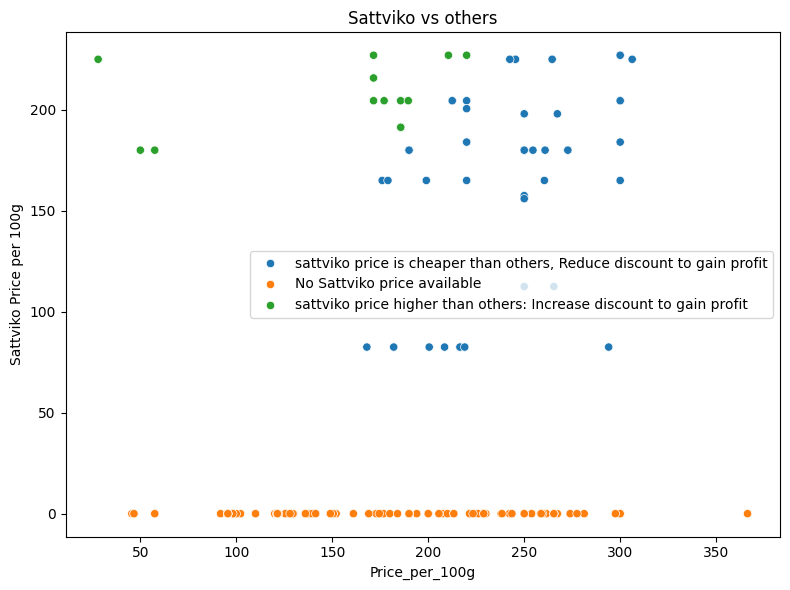

In [96]:
# Compare sattviko_price_per_100gm vs. competitor_price_per_100g
#if sattviko_price_per_100gm  competitor_price_per_100g
def discount_strategy(row):
    if row["sattviko_price_per_100gm"] == 0:   
        return "No Sattviko price available"
    elif row["sattviko_price_per_100gm"] < row["Price_per_100g"]:
        return "sattviko price is cheaper than others, Reduce discount to gain profit"
    elif row["sattviko_price_per_100gm"] > row["Price_per_100g"]:
        return "sattviko price higher than others: Increase discount to gain profit"
    else:
        return "same price: Keep discount same"

data['strategy']= data.apply(discount_strategy, axis=1)

plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x="Price_per_100g", y="sattviko_price_per_100gm",hue="strategy")

plt.xlabel("Price_per_100g")
plt.ylabel("Sattviko Price per 100g")
plt.title("Sattviko vs others")
plt.legend()
plt.tight_layout()
plt.show()

 here we have more product whose price is cheaper than other  ,so we can reduce discount to gain profit

In [97]:
# exporting cleaned dataset
data.to_excel('cleaned_food_delivery_app_data.xlsx')